In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from IPython.display import display
%matplotlib inline
mpl.rcParams['figure.figsize'] = (15, 6)

In [3]:
data1 = pd.read_csv("Anlage1.csv", sep=";", parse_dates=['timestamp'], index_col=['timestamp'])

data = []
for i in range(5):
    data.append(pd.read_csv("Anlage"+str(i+1)+".csv", sep=";", parse_dates=['timestamp'], index_col=['timestamp']))
for i in range(5):
    data[i].to_csv("Data_"+str(i)+".csv")

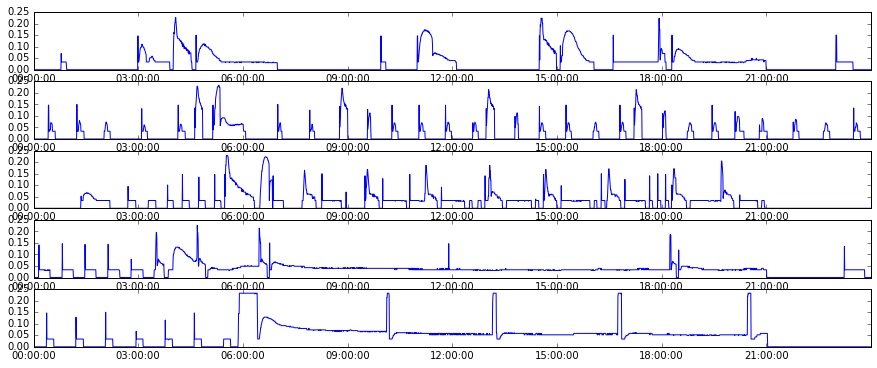

In [49]:
for i in range(5):
    mpl.subplot(5,1,i+1)
    mpl.plot(data[i]['timestamp'][:2880], data[i]['energy_consumption_kwh'][:2880])
mpl.show()

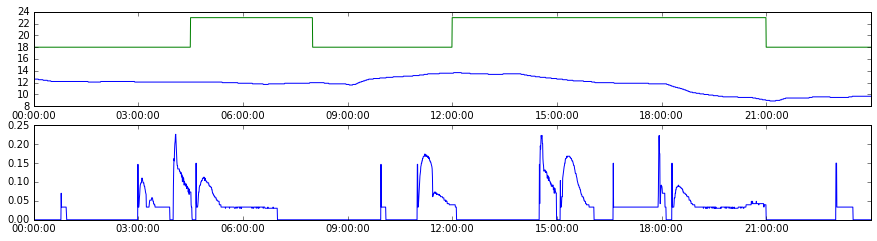

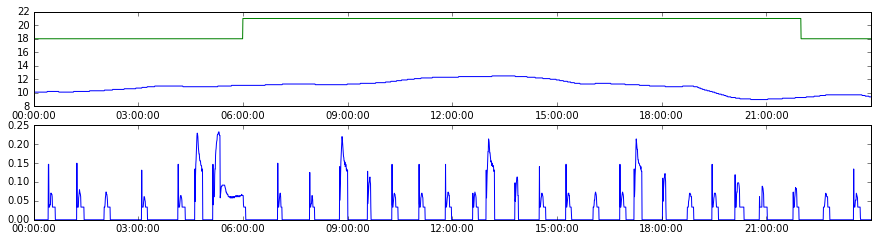

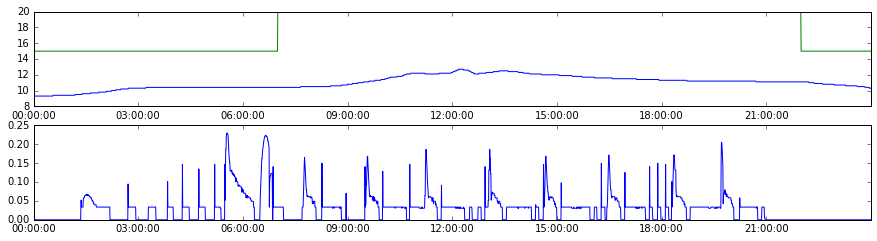

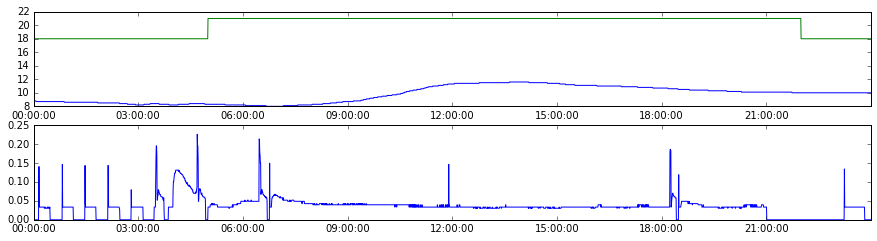

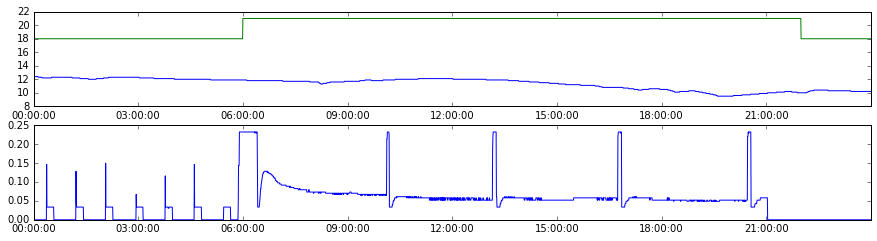

In [50]:
mpl.rcParams['figure.figsize'] = (15, 20)
for i in range(5):
    mpl.subplot(10,1,i*2+1)
    mpl.plot(data[i]['timestamp'][:2880], data[i]['outdoor_temperature_celsius'][:2880])
    mpl.plot(data[i]['timestamp'][:2880], data[i]['indoor_target_temperature_celsius'][:2880])
    mpl.subplot(10,1,i*2+2)
    mpl.plot(data[i]['timestamp'][:2880], data[i]['energy_consumption_kwh'][:2880])
    mpl.show()

7.572035868053792

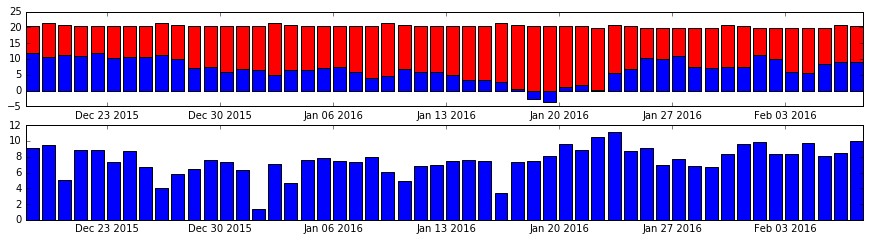

5.2481580471128808

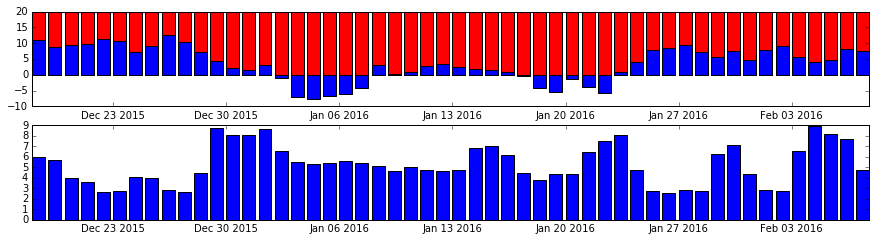

10.138937606316635

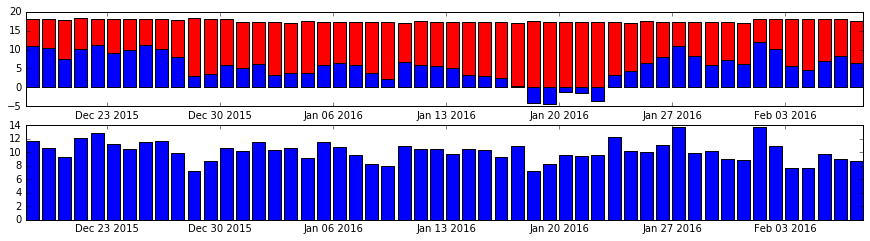

9.1565316796560303

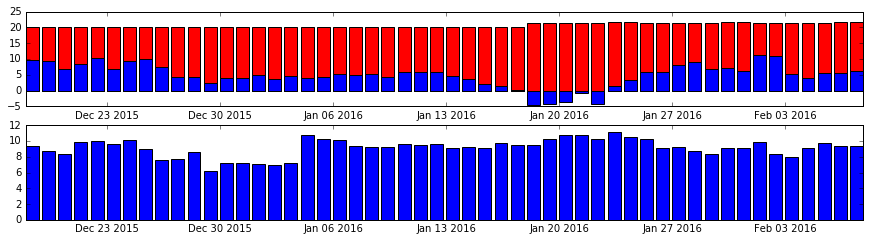

10.401384310776406

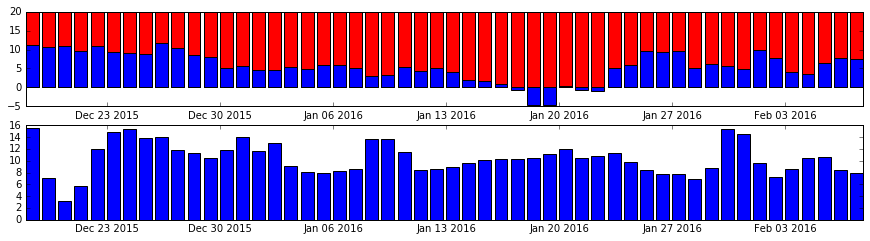

In [95]:
mpl.rcParams['figure.figsize'] = (15, 20)
for i in range(5): 
    gb = data[i].groupby(data[i].index.date)
    df = gb.agg({"outdoor_temperature_celsius": np.mean, "energy_consumption_kwh": np.sum, "indoor_target_temperature_celsius": np.mean, "online_state": np.mean})
    df['avg_diff'] = df['indoor_target_temperature_celsius'] - df['outdoor_temperature_celsius']
    df['bla'] = df.energy_consumption_kwh / df.avg_diff
    df[df['online_state'] != 1]
        
    display(np.mean(df.bla))
        
    mpl.rcParams['figure.figsize'] = (15, 20)
    mpl.subplot(10,1,i*2+1)
    mpl.bar(df.index, df.indoor_target_temperature_celsius, color="red")
    mpl.bar(df.index, df.outdoor_temperature_celsius, color="blue")
    mpl.subplot(10,1,i*2+2)
    mpl.bar(df.index, df.bla, color="blue")
    mpl.show()

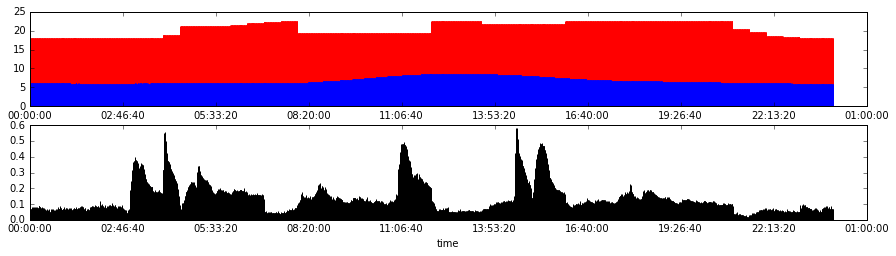

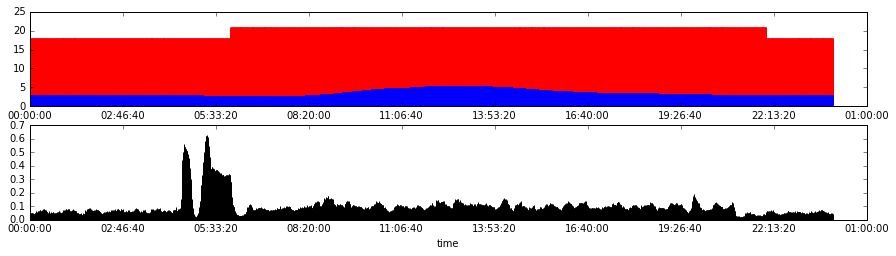

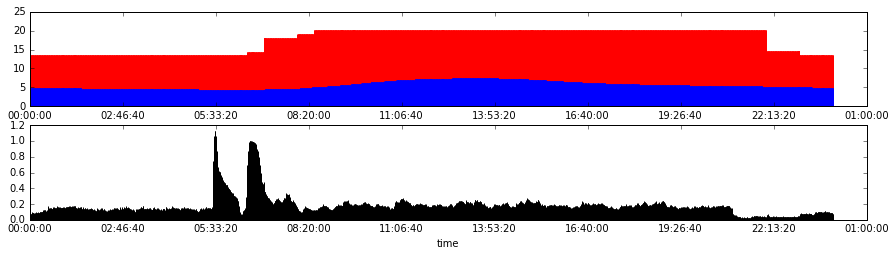

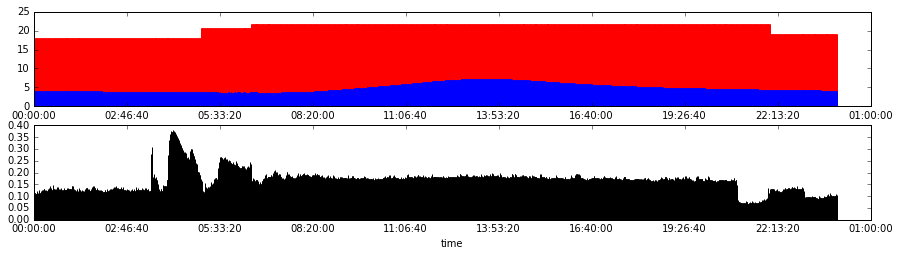

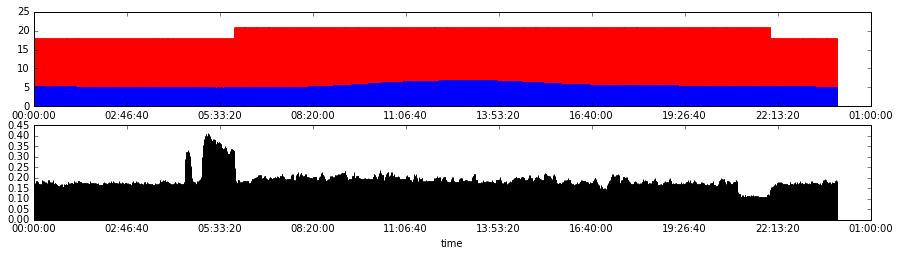

In [99]:
mpl.rcParams['figure.figsize'] = (15, 20)
for i in range(5): 
    gb = data[i].groupby(data[i].index.time)
    df = gb.agg({"outdoor_temperature_celsius": np.mean, "energy_consumption_kwh": np.sum, "indoor_target_temperature_celsius": np.mean, "online_state": np.mean})
    df['avg_diff'] = df['indoor_target_temperature_celsius'] - df['outdoor_temperature_celsius']
    df['bla'] = df.energy_consumption_kwh / df.avg_diff
    #df[df['online_state'] != 1]
        
    mpl.rcParams['figure.figsize'] = (15, 20)
    mpl.subplot(10,1,i*2+1)
    mpl.bar(df.index, df.indoor_target_temperature_celsius, color="red", edgecolor="red")
    mpl.bar(df.index, df.outdoor_temperature_celsius, color="blue", edgecolor="blue")
    mpl.subplot(10,1,i*2+2)
    mpl.bar(df.index, df.bla, color="blue")
    mpl.show()

In [ ]:
energy_days = data1['energy_consumption_kwh'].reshape(-1,2880)
thing = np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(-1,3)

thing 
#december 18, 2015 is friday
energy_days_sum = energy_days.sum(axis=0)
energy_days_sum

In [ ]:
num_weeks = np.floor(energy_days_sum.shape[0]/7).astype(int)
print(np.floor(num_weeks).astype(int))
num_missing_days = num_weeks*7-energy_days_sum.shape[0]
display(num_weeks)
#energy_sum_weekdays = np.pad(energy_days_sum, pad_width=(0,num_missing_days), mode='constant', constant_values=0)
energy_sum_weekdays = energy_days_sum[:num_weeks*7].reshape(-1,7)
display(energy_sum_weekdays)

energy_weekdays_sum = energy_sum_weekdays.sum(axis=0)
display(energy_weekdays_sum)